# <strong><font color='red'>Modelos Predictivos para Decisiones Estratégicas</font></strong>

Se aborda teoría básica, código en Python (con bibliotecas como scikit-learn, statsmodels y prophet), visualizaciones y ejemplos aplicados con datasets conocidos:
1. Regresión
2. Clasificación
3. Series temporales


**Librerías**
<br> Antes de comenzar a explorar nuestros datos, es importante importar las bibliotecas que nos permitirán manipularlos y visualizarlos.

In [ ]:
# Importar librerías 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cmdstanpy #cmdstanpy.install_cmdstan()

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

sns.set_context("paper")  # Tamaño de fuente más profesional
sns.set_style("whitegrid")  # Fondo blanco con rejilla sutil

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

# Dataset: Boston Housing
from sklearn.datasets import fetch_california_housing
# Dataset: Iris
from sklearn.datasets import load_iris
# Dataset: Ventas mensuales simuladas
from prophet import Prophet

---
## <strong><font color='blue'>1️⃣ Regresión Polinómica: Predicción de Variables Continuas</font></strong> 

La regresión es una técnica estadística utilizada para **predecir valores numéricos** (continuos) a partir de otras variables. Una variable continua puede tomar un número infinito de valores dentro de un rango. Ejemplos:
- Edad
- Altura
- Temperatura
- Precio

Esto las distingue de las variables categóricas como género, color, o tipo de producto.

### ⚙️ Tipos de regresión

| Tipo de regresión         | Características                            |
|---------------------------|--------------------------------------------|
| Regresión lineal simple| Usa una sola variable independiente        |
| Regresión lineal múltiple| Usa varias variables independientes      |
| Regresión no lineal    | La relación entre variables no es lineal  |

La **regresión polinómica** modela la relación entre la variable independiente y la dependiente como un polinomio. Es útil cuando los datos no se ajustan bien a una línea recta. 

### 🧮 Forma general de un polinomio de grado n:
y = β₀ + β₁x + β₂x² + β₃x³ + ... + βₙxⁿ + ε

Donde:
- `y` es la variable dependiente.
- `x` es la variable independiente.
- `β₀, β₁, ..., βₙ` son los coeficientes.
- `ε` es el error aleatorio.
- `n` es el **grado del polinomio** que determina la complejidad del modelo.

### 📊 ¿Por qué usar regresión polinómica?
- Para capturar **relaciones no lineales**.
- Para mejorar el ajuste del modelo sin recurrir a algoritmos más complejos.
- Para analizar **tendencias curvilíneas** en los datos.

###📌 Consideraciones importantes
- Elegir el grado adecuado del polinomio es **clave**: un grado muy alto puede sobreajustar los datos (overfitting).
- Se puede aplicar utilizando técnicas como **mínimos cuadrados** o modelos de aprendizaje automático.
- Es recomendable **visualizar los datos** para decidir si un modelo polinómico es apropiado.

### 🧪 Aplicaciones en la vida real
- Predecir el precio de productos según características.
- Estimar el tiempo de entrega dependiendo del tipo de transporte.
- Calcular rendimiento académico según horas de estudio.

### ✅ ¿Cuándo usarla?
Cuando quieres responder a preguntas como:
¿Cuánto costará? ¿Cuántas unidades se venderán? ¿Qué valor se espera?

### 🎯 Ejemplos
> 🎓 Ejemplo 1: Supón que estás estudiando cómo cambia el **rendimiento académico** según la cantidad de horas de estudio. Una relación no lineal puede indicar que después de cierto punto, estudiar más no mejora tanto el rendimiento, o incluso lo perjudica.

> 🎓 Ejemplo 2: Estudiemos cómo la **edad de una persona afecta su presión arterial**. Al analizar los datos, encontramos que la relación no es lineal. La presión tiende a subir en ciertas etapas, estabilizarse, y luego aumentar nuevamente en la vejez. 
<br> Presión = 0.05 × Edad² - 2 × Edad + 120
<br> Es decir:
- `0.05 × Edad²` introduce **curvatura al modelo**, permitiendo representar un comportamiento que cambia con la edad.
- `-2 × Edad` modula el impacto lineal de la edad.
- `+120` es el valor base de presión cuando la edad es cero (de nuevo, sin interpretación práctica, pero necesario en el modelo).

#### Si una persona tiene **40 años**, entonces:
Presión = 0.05 × (40)² - 2 × 40 + 120 = 0.05 × 1600 - 80 + 120 = 80 - 80 + 120 = 120 mmHg

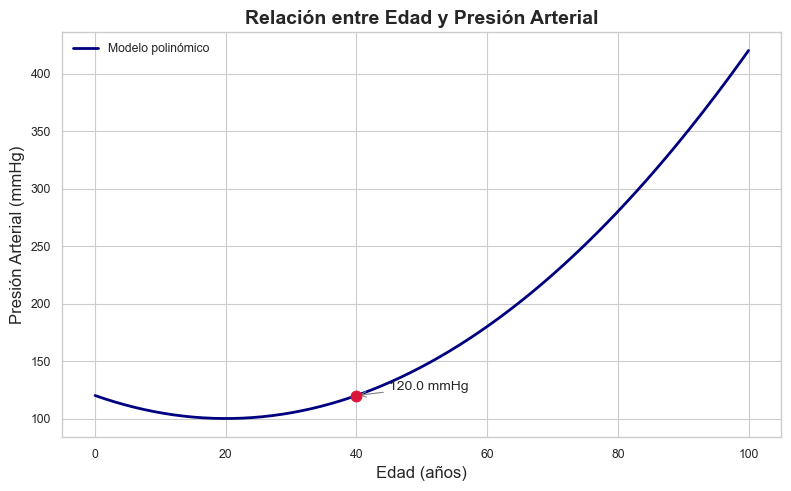

In [ ]:
# 🧮 Definimos la función polinómica
def presion_arterial(edad):
    return 0.05 * edad**2 - 2 * edad + 120

# 🧠 Datos
edades = np.linspace(0, 100, 200)
presiones = presion_arterial(edades)
edad_40 = 40
presion_40 = presion_arterial(edad_40)

# 🎨 Gráfico tipo artículo
plt.figure(figsize=(8, 5))
plt.plot(edades, presiones, color='navy', linewidth=2, label='Modelo polinómico')
plt.scatter(edad_40, presion_40, color='crimson', s=60, zorder=5)
plt.annotate(f'{presion_40:.1f} mmHg', xy=(edad_40, presion_40),
             xytext=(edad_40 + 5, presion_40 + 5),
             arrowprops=dict(arrowstyle='->', color='gray'),
             fontsize=10)

# 🏷 Etiquetas y título tipo paper
plt.title('Relación entre Edad y Presión Arterial', fontsize=14, weight='bold')
plt.xlabel('Edad (años)', fontsize=12)
plt.ylabel('Presión Arterial (mmHg)', fontsize=12)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

> 🎓 Ejemplo 3: **Predicción de precios de vivienda**
<br> Este ejercicio usa un modelo de regresión lineal para predecir el valor de una vivienda. Entrenamos el modelo con variables como ingresos y número de habitaciones.
Evaluamos el rendimiento usando métricas como MAE y RMSE. Finalmente, visualizamos cómo se comparan las predicciones con los valores reales.

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.3333

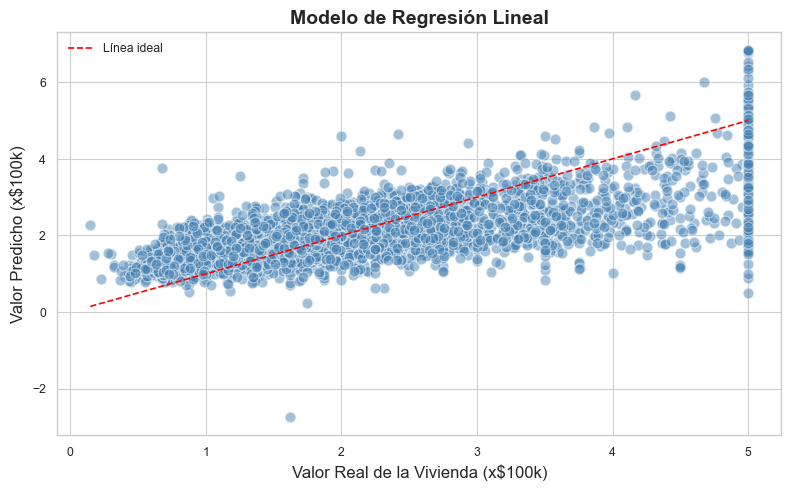

In [ ]:
# 🗂 Cargar datos
data = fetch_california_housing(as_frame=True)
df = data.frame.copy()

# 🔎 Exploración básica
print(df.head())
print(df.describe())

# 🎯 Selección de variables predictoras y objetivo
X = df[['MedInc', 'AveRooms', 'AveOccup']]
y = df['MedHouseVal']

# 📚 División de conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ⚙️ Entrenamiento del modelo
model = LinearRegression()
model.fit(X_train, y_train)

# 📈 Predicción
y_pred = model.predict(X_test)

# 🧮 Evaluación
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# 📌 Mostrar coeficientes del modelo
coeficientes = model.coef_
intercepto = model.intercept_
print("Intercepto:", intercepto)
print("Coeficientes:", coeficientes)
for nombre, coef in zip(X.columns, coeficientes):
    print(f"{nombre}, {coef:.4f}")

# 🎨 Visualización 
sns.set_context("paper")
sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='steelblue', edgecolor='white', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Línea ideal')
plt.xlabel("Valor Real de la Vivienda (x$100k)", fontsize=12)
plt.ylabel("Valor Predicho (x$100k)", fontsize=12)
plt.title("Modelo de Regresión Lineal", fontsize=14, weight='bold')
plt.legend(frameon=False)
plt.tight_layout()
plt.show()


#### 📎 Interpretación básica de cada variable:
- `MedInc` (Ingreso medio): Un coeficiente positivo indica que a mayor ingreso en la zona, mayor será el valor medio de la vivienda.
- `AveRooms` (Promedio de habitaciones por vivienda): Si es negativo, puede estar capturando zonas con hacinamiento o construcciones más simples.
- `AveOccup` (Promedio de ocupantes por vivienda): Un coeficiente pequeño podría indicar que esta variable tiene menos impacto, pero depende de la escala.

#### 🧮 Interpretación básica de métricas:

- **MAE (Error Absoluto Medio):** `0.62`
  - Indica que, en promedio, las predicciones del modelo se desvían en **$62,000** del valor real de las viviendas.
  - Penaliza errores grandes y pequeños por igual.

- **RMSE (Raíz del Error Cuadrático Medio):** `0.84`
  - La desviación promedio es de **$84,000**, pero los errores grandes tienen mayor impacto debido a la penalización cuadrática.
  - Más sensible a outliers que el MAE.

| Métrica | Valor | Interpretación | Sensibilidad |
|--------|--------|----------------|--------------|
| MAE | 0.62 | Error promedio absoluto | Baja sensibilidad a errores grandes |
| RMSE | 0.84 | Desviación media penalizada | Alta sensibilidad a errores extremos |

El valor más alto del RMSE en comparación con el MAE sugiere que **existen algunas predicciones con errores considerablemente grandes**.

#### 📌 Notas de interpretación:
Para mejorar el rendimiento del modelo, podría considerarse:
- Explorar **transformaciones no lineales**
- Probar modelos más complejos como **Random Forest** o **Gradient Boosting**
- Detectar y tratar **outliers**

---
## <strong><font color='blue'>2️⃣ Clasificación: Predicción de Categorías</font></strong> 

La **clasificación** es una técnica de aprendizaje supervisado donde el objetivo es **predecir categorías o etiquetas discretas**. A diferencia de la regresión, que estima valores continuos, la clasificación predice si una observación pertenece a un grupo específico.

> 🎓 Ejemplo: predecir si un email es spam o no, si una imagen representa un gato o un perro, o si un estudiante aprobará o no una materia.

### 🔍 Características Clave
- **Variable objetivo (`y`)**: categórica (binaria o multiclase)
- **Variables independientes (`X`)**: numéricas, categóricas o mixtas
- **Salida esperada**: etiqueta o clase que identifica la categoría


### 🧪 Modelos de Clasificación
| Modelo                      | Características principales                             |
|----------------------------|----------------------------------------------------------|
| `LogisticRegression`        | Clasificación binaria con interpretabilidad              |
| `KNeighborsClassifier`      | Basado en similitud con vecinos cercanos                 |
| `DecisionTreeClassifier`    | Árboles de decisión intuitivos y visuales                |
| `RandomForestClassifier`    | Ensemble de árboles para mayor precisión                 |
| `SVM` (Máquinas de soporte) | Separación óptima entre clases                          |
| `Naive Bayes`               | Eficiente con variables categóricas                     |

### 📊 Métricas de Evaluación
Las métricas de evaluación son fundamentales para analizar el rendimiento de un modelo de clasificación:

| Métrica            | Descripción                                                                 | ¿Cómo se interpreta?                                                                 |
|--------------------|------------------------------------------------------------------------------|---------------------------------------------------------------------------------------|
| `Accuracy` (Exactitud) | Proporción total de predicciones correctas (Precisión global).            | Evalúa el rendimiento general del modelo. Es útil cuando las clases están balanceadas. |
| `Precision`        | Porcentaje de verdaderos positivos entre todas las predicciones positivas.  | Indica cuántas de las predicciones positivas fueron realmente correctas. Evita falsos positivos. |
| `Recall` (Sensibilidad) | Porcentaje de verdaderos positivos detectados correctamente.         | Mide la capacidad del modelo para detectar casos positivos reales. Evita falsos negativos. |
| `F1-Score`         | Media armónica entre la precisión y el recall.                              | Equilibra precisión y recall. Útil cuando hay desbalance entre clases.                 |
| `Confusion Matrix` | Tabla que muestra verdaderos positivos/negativos y falsos positivos/negativos. | Permite identificar en qué clases el modelo acierta o falla. Facilita el análisis de errores. |


> Si todas las clases tienen `precision`, `recall` y `f1-score` cercanas a 1.00, el modelo tiene un excelente desempeño.

### 🧪 Aplicaciones en la vida real
La clasificación se aplica en múltiples disciplinas académicas para resolver problemas reales:
- **Medicina**: Diagnóstico automático de enfermedades a partir de síntomas o imágenes médicas.
- **Educación**: Predicción de deserción estudiantil o rendimiento académico.
- **Lingüística Computacional**: Clasificación de textos por sentimiento, género o temática.
- **Finanzas**: Detección de fraudes en transacciones bancarias.
- **Ingeniería**: Reconocimiento de objetos y defectos en imágenes técnicas.
- **Psicología**: Identificación de patrones de comportamiento según respuestas a pruebas.

### ✅ ¿Cuándo usarla?
Cuando la pregunta es tipo:
¿Es sí o no? ¿A qué clase pertenece? ¿Qué categoría asignar?

### 🎯 Ejemplos
> 🎓 Ejemplo 1: Vamos a predecir si un estudiante aprobará una materia según su tiempo de estudio. ¿Aprobará el estudiante?
Imaginemos un conjunto de datos con dos columnas:
- `horas_estudio`: número de horas que el estudiante estudia por semana
- `aprobó`: si el estudiante aprobó (1) o no (0)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



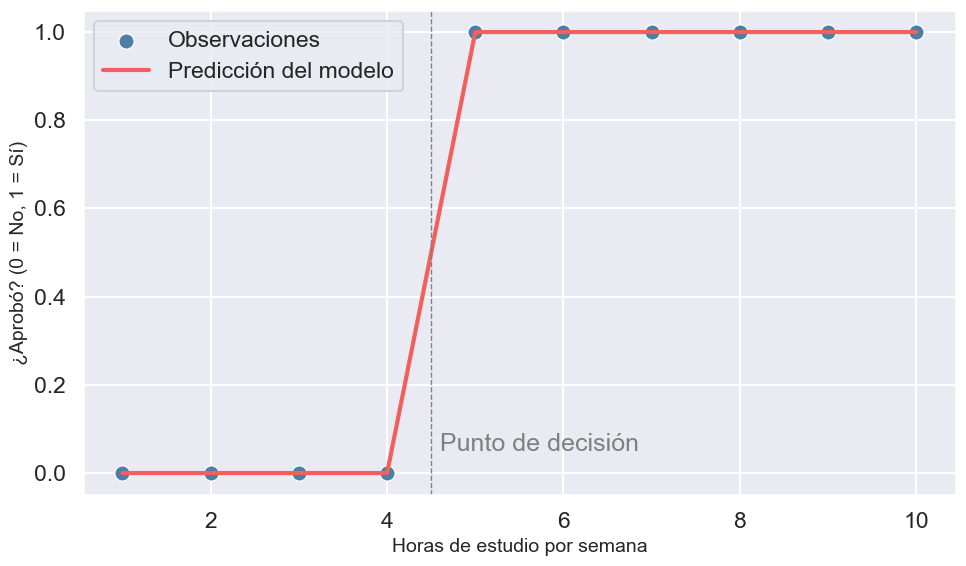

In [ ]:
# Datos simulados
datos = pd.DataFrame({
    'horas_estudio': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'aprobo':        [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
})

# Separación de variables
X = datos[['horas_estudio']]
y = datos['aprobo']

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamiento del modelo con árbol de decisión
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)

# Predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test)
datos['prediccion'] = modelo.predict(X)

# Evaluación del rendimiento
print(classification_report(y_test, y_pred))

# Visualización 
sns.set(style="darkgrid", context="talk")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='horas_estudio', y='aprobo', data=datos, s=120, color='#4D7EA8', label='Observaciones')
sns.lineplot(x='horas_estudio', y='prediccion', data=datos, color='#F25F5C', linewidth=3, label='Predicción del modelo')
plt.axvline(x=4.5, color='gray', linestyle='--', linewidth=1)
plt.text(4.6, 0.05, 'Punto de decisión', color='gray')
plt.xlabel('Horas de estudio por semana', fontsize=14)
plt.ylabel('¿Aprobó? (0 = No, 1 = Sí)', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

#### 📎 **Interpretación de la gráfica:**
- Los puntos azules representan estudiantes individuales.
- La línea roja muestra la decisión del modelo sobre quién aprueba según sus horas de estudio.
- Se puede observar un punto de quiebre (alrededor de 4-5 horas) donde el modelo empieza a predecir “aprobado”.

> 🎓 Ejemplo 2: **Reconocimiento de especies de flores**
<br> Aquí usamos un clasificador de Random Forest sobre el dataset de Iris. El modelo aprende a diferenciar entre especies de flores según medidas como el largo del pétalo.
Evaluamos el desempeño con métricas de precisión y matriz de confusión. La visualización muestra cómo el modelo distingue correctamente las clases.
El dataset Iris contiene muestras de tres especies de flores (`setosa`, `versicolor`, `virginica`) y cuatro características: 
- `sepal length`
- `sepal width`
- `petal length`
- `petal width`

El objetivo del modelo es **clasificar correctamente la especie** de cada flor usando sus mediciones.



              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



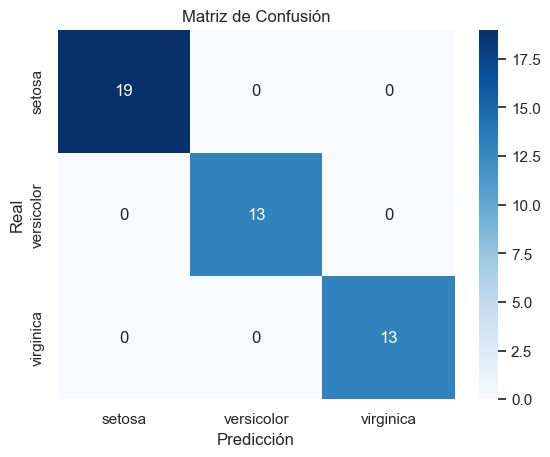

In [ ]:
# Dataset: Iris

# Cargar datos
iris = load_iris(as_frame=True)
df = iris.frame

# Variables
X = df.drop('target', axis=1)
y = df['target']

# División
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predicción
y_pred = clf.predict(X_test)

# Evaluación
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


#### 📎 **Interpretación:**
La matriz de confusión permite observar:
- Diagonal principal: aciertos (predicción igual a realidad)
- Fuera de la diagonal: errores (confusiones entre especies)

Si la matriz solo tiene valores en la diagonal, significa **cero errores de clasificación**, ideal para validar la eficiencia del modelo.


---
## <strong><font color='blue'>3️⃣ Series Temporales: Predicción Basada en Tiempo</font></strong> 

Una serie temporal es una secuencia de observaciones recogidas en intervalos de tiempo regulares. Ejemplos clásicos incluyen:
- Temperatura diaria 🌡️
- Precios de acciones 📈
- Ventas mensuales 🛒

El propósito es modelar el comportamiento temporal para predecir valores futuros con base en el pasado. Esto incluye:
- Estimar tendencias
- Detectar patrones cíclicos o estacionales
- Ajustar ruido y anomalías

### ⚙️ Componentes de la Serie Temporal

| Componente      | Descripción                                                                  |
|-----------------|-------------------------------------------------------------------------------|
| Tendencia       | Dirección general a largo plazo (↑ o ↓)                                      |
| Estacionalidad  | Patrón que se repite en intervalos constantes (ej. mensual, anual)            |
| Ciclo           | Fluctuaciones de largo plazo, pero no necesariamente periódicas              |
| Ruido           | Variaciones aleatorias no explicables por otros componentes                  |

### 📐 Modelos Clásicos de Predicción
🔁 **ARIMA.** El modelo ARIMA se ajusta a series temporales no estacionarias para realizar pronósticos. Modelo combina:
- **AR (AutoRegresión):** dependencia lineal entre valores pasados.
- **I (Integración):** diferenciación para hacer la serie estacionaria.
- **MA (Media Móvil):** modelo de ruido basado en errores pasados.

❄️ **SARIMA.** Extiende ARIMA para incorporar **estacionalidad explícita**.

📉 **Suavizado Exponencial.** Métodos como **Holt-Winters** que ajustan tendencia y estacionalidad con mayor simplicidad.

🤖 Machine Learning y Deep Learning
- Random Forest, XGBoost: para series no lineales
- **LSTM (Long Short-Term Memory):** redes neuronales recurrentes que recuerdan patrones largos

### 📊 Métricas de Evaluación
| Métrica | Definición                                                   | ¿Cómo se interpreta?                                                                 |
|---------|---------------------------------------------------------------|---------------------------------------------------------------------------------------|
| MAE     | Error Absoluto Medio                                          | Promedio de los errores absolutos. Indica cuánto se desvían en promedio las predicciones con respecto a los valores reales. |
| RMSE    | Raíz del Error Cuadrático Medio (penaliza más los errores grandes) | Similar a MAE pero penaliza errores grandes de forma más severa. Útil cuando es importante minimizar los errores extremos. |
| MAPE    | Error Porcentual Absoluto Medio                               | Promedio del porcentaje de error. Ayuda a evaluar qué tan significativa es la diferencia entre los valores reales y predichos, en términos relativos. |


### 🧪 Aplicaciones en Python
Librerías útiles:
- `statsmodels` para ARIMA/SARIMA
- `prophet` de Meta para predicción con estacionalidad y fechas especiales
- `sklearn` para modelos de regresión o ML
- `tensorflow/keras` para LSTM

### 📌 Ejemplo de Flujo de Modelado
1. Visualizar la serie temporal
2. Verificar estacionariedad (Dickey-Fuller)
3. Descomponer en componentes
4. Ajustar el modelo
5. Validar y pronosticar
6. Evaluar métricas

> 🎓 Ejemplo 1: Usaremos datos simulados de temperaturas diarias para predecir cómo evolucionarán en el futuro.


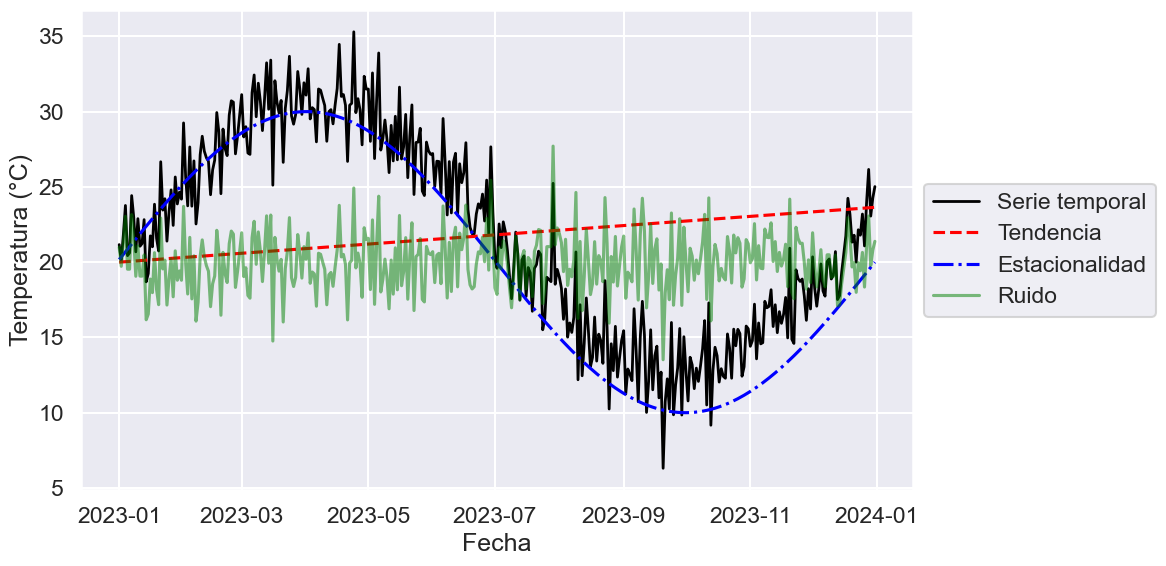

In [ ]:
# 📅 Generar fechas
dias = pd.date_range(start='2023-01-01', periods=365, freq='D')

# 🌡️ Componentes de la serie temporal
np.random.seed(42)
tendencia = 0.01 * np.arange(365)
estacionalidad = 10 * np.sin(2 * np.pi * dias.dayofyear / 365)
ruido = np.random.normal(loc=0, scale=2, size=365)

# 🔧 Construir serie final
serie = 20 + tendencia + estacionalidad + ruido
df = pd.DataFrame({
    'fecha': dias,
    'serie': serie,
    'tendencia': tendencia + 20,
    'estacionalidad': estacionalidad,
    'ruido': ruido
})
df.set_index('fecha', inplace=True)

# 🎨 Visualización 
plt.figure(figsize=(12, 6))
plt.plot(df['serie'], label='Serie temporal', color='black', linewidth=2)
plt.plot(df['tendencia'], label='Tendencia', color='red', linestyle='--')
plt.plot(df['estacionalidad'] + 20, label='Estacionalidad', color='blue', linestyle='-.')
plt.plot(df['ruido'] + 20, label='Ruido', color='green', alpha=0.5)

plt.xlabel("Fecha")
plt.ylabel("Temperatura (°C)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()


#### 📎 **¿Qué representa cada curva?**

<br> 🔴 **Tendencia**: línea roja discontinua — crecimiento constante.
<br> 🔵 **Estacionalidad**: patrón azul ondulado — ciclos anuales.
<br> 🟢 **Ruido**: variación verde — altibajos aleatorios.

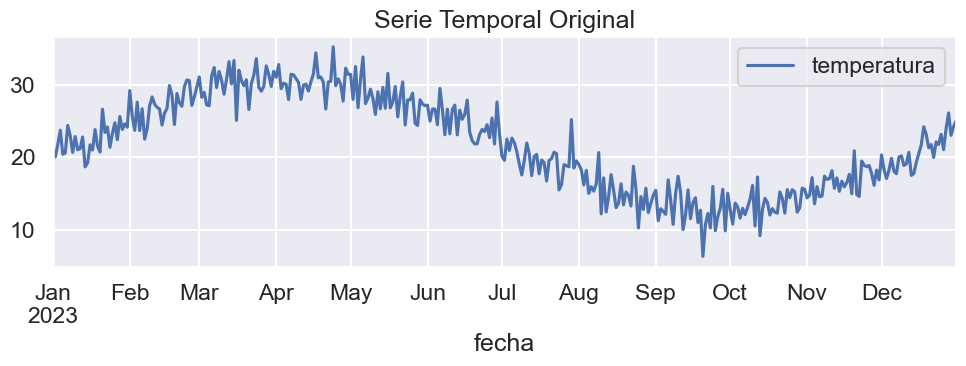

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 🗃️ Usar  serie simulada
dias = pd.date_range(start='2023-01-01', periods=365, freq='D')
np.random.seed(42)
tendencia = 0.01 * np.arange(365)
estacionalidad = 10 * np.sin(2 * np.pi * dias.dayofyear / 365)
ruido = np.random.normal(loc=0, scale=2, size=365)
serie = 20 + tendencia + estacionalidad + ruido
df = pd.DataFrame({'fecha': dias, 'temperatura': serie})
df.set_index('fecha', inplace=True)

# 📉 Graficar la serie
df.plot(title="Serie Temporal Original", figsize=(10, 4))
plt.grid(True)
plt.tight_layout()
plt.show()


#### **Autocorrelación (ACF) y Autocorrelación Parcial (PACF)**

##### 📍 Autocorrelación (ACF)

- Mide la correlación entre la serie y versiones retrasadas de sí misma (lags).
- Indica cómo el pasado influye en el presente en términos generales.
- Se representa como un gráfico de barras: cada barra muestra el grado de correlación en ese retraso específico.

Interpretación práctica:
- Si muchas barras están por encima del umbral → la serie tiene **persistencia**.
- Si sólo las primeras están altas y luego caen → puede ser señal de una **estructura AR (autoregresiva)**.


##### 📍 Autocorrelación Parcial (PACF)

- Mide la correlación entre la serie y sus lags **eliminando la influencia de los lags intermedios**.
- Es útil para identificar la verdadera contribución de cada lag.

Interpretación práctica:
- Si el gráfico PACF muestra una caída abrupta después del primer o segundo lag → sugiere un modelo AR de orden bajo.
- Si hay un patrón prolongado → puede indicar orden mayor.

#### ¿Cómo usarlas?

Cuando ajustas un modelo ARIMA:

- **PACF** → ayuda a elegir `p` (parte autoregresiva).
- **ACF** → ayuda a elegir `q` (parte de promedio móvil).

🔧 Ejemplo:  
- PACF con picos en lag 1 y 2 → podrías intentar ARIMA(p=2, d=?, q=?)
- ACF con picos en ACF con picos en lag 1 → posible q=1



#### 📉 Resumen de Gráficos ACF / PACF

- **ACF (Autocorrelación)**:  
  Muestra cómo los datos se relacionan con sus valores anteriores.

- **PACF (Autocorrelación Parcial)**:  
  Ayuda a identificar el número de lags relevantes sin interferencia de otros.




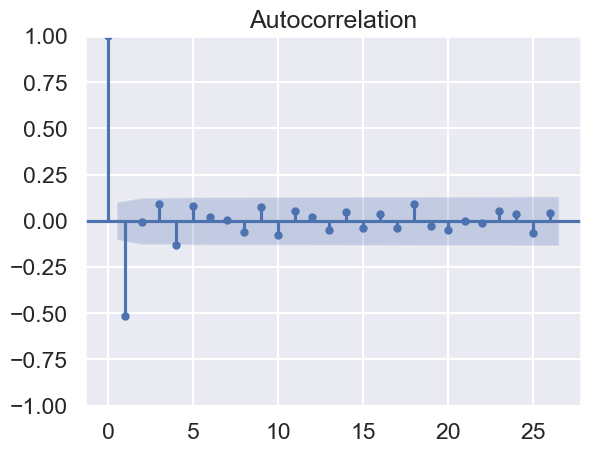

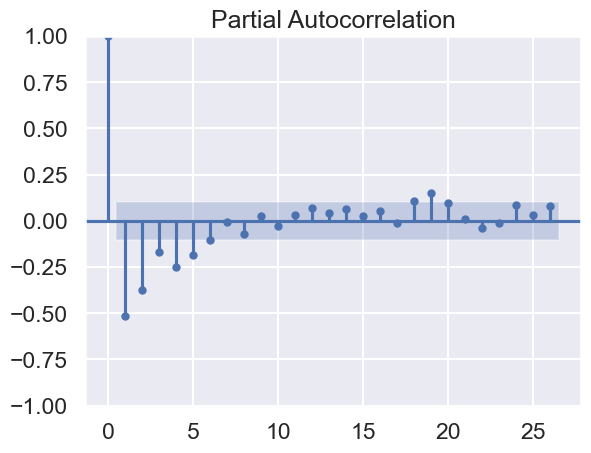

In [ ]:
# 🎯 Prueba de estacionariedad + diferenciar serie
serie_diff = df.diff().dropna()
# 🔍 ACF y PACF para estimar parámetros
plot_acf(serie_diff)
plot_pacf(serie_diff)
plt.show()


⚙️ Parámetros del Modelo

- `p`: Número de retardos (lags) en los datos. Captura relaciones pasadas.
- `d`: Número de diferenciaciones. Convierte una serie no estacionaria en estacionaria.
- `q`: Número de retardos en los errores del modelo. Modela la dependencia entre errores pasados.

Ejemplo ajustado: `ARIMA(5,1,2)` →  
- Usa 5 valores pasados,  
- Aplica 1 diferenciación,  
- Usa 2 errores pasados.

c:\Users\bernarda.salazar\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\bernarda.salazar\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\bernarda.salazar\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\bernarda.salazar\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


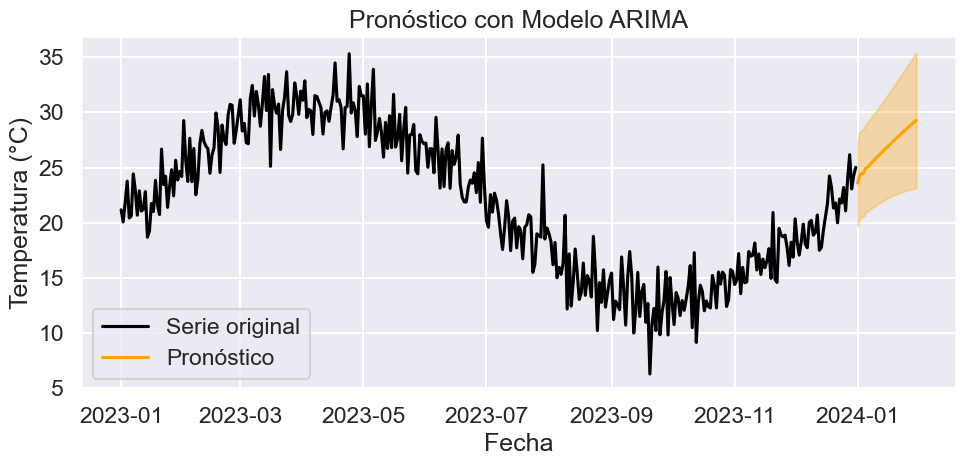

In [ ]:
# 🧠 Ajustar modelo ARIMA (p, d, q)
modelo = ARIMA(df, order=(5,1,2))  
modelo_fit = modelo.fit()

# 📈 Pronóstico
pred = modelo_fit.get_forecast(steps=30)
pred_ci = pred.conf_int()

# 🖼️ Visualizar predicción
plt.figure(figsize=(10, 5))
plt.plot(df, label='Serie original', color='black')
plt.plot(pred.predicted_mean, label='Pronóstico', color='orange')
plt.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='orange', alpha=0.3)
plt.title("Pronóstico con Modelo ARIMA")
plt.xlabel("Fecha")
plt.ylabel("Temperatura (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Colores:
<br>
- **Línea negra**: Serie original simulada.
- **Línea naranja**: Predicción futura.
- **Franja sombreada**: Intervalo de confianza al 95%.

#### 📎 **Interpretación y análisis:**
- Si el intervalo de confianza es estrecho → el modelo es más preciso.
- Si el pronóstico sigue la dirección esperada (por ejemplo, tendencia ascendente), valida el ajuste.
- Los valores estimados (`pred.predicted_mean`) representan el comportamiento futuro esperado.
- Se puede comparar con observaciones reales (si se tienen) para evaluar precisión.
- El modelo puede recalibrarse periódicamente para mejorar su rendimiento.

#### Resultados del Modelo (`modelo_fit.summary()`)
- **AIC / BIC**:  
  Valores de penalización para el ajuste. Más bajos → mejor modelo con menos complejidad.
 
- **Coeficientes del modelo**:  
  Valores numéricos que indican la contribución de cada parámetro (AR y MA).

- **Significancia estadística (`p-values`)**:  
  Si el valor < 0.05 → el parámetro es significativamente útil en el modelo.

- **Test de Ljung-Box**:  
  Valida si los residuos son "ruido blanco" → es decir, no hay patrones no explicados restantes.

In [ ]:
## Resultados del Modelo (`modelo_fit.summary()`)
modelo_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            temperatura   No. Observations:                  365
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -768.334
Date:                Mon, 28 Jul 2025   AIC                           1552.669
Time:                        13:15:24   BIC                           1583.846
Sample:                    01-01-2023   HQIC                          1565.060
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8996      0.070     12.847      0.000       0.762       1.037
ar.L2          0.0313      0.074      0.422      0.673      -0.114       0.176
ar.L3          0.0580      0.075      0.777      0.437      -0.088       0.204
ar.L4         -0.1180      0.072     -1.630      0.103      -0.260       0.024
ar.L5          0.1186      0.057      2.093      0.036       0.008       0.230
ma.L1         -1.8425      0.045    -40.708      0.000      -1.931      -1.754
ma.L2          0.8535      0.045     18.913      0.000       0.765       0.942
sigma2         3.9536      0.268     14.773      0.000       3.429       4.478
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.86
Prob(Q):                              1.00   Prob(JB):                         0.05
Heteroskedasticity (H):               0.99   Skew:                             0.07
Prob(H) (two-sided):                  0.98   Kurtosis:                         3.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 🧩 Comparación Rápida de Técnicas Predictivas

| Técnica              | Tipo de Predicción        | Ejemplo Típico                     | Tipo de Salida                     |
|----------------------|----------------------------|-------------------------------------|------------------------------------|
| **Regresión**        | Valor continuo             | Precio de una vivienda              | Número real (ej. 150,000)          |
| **Clasificación**    | Categoría o clase          | Diagnóstico médico (benigno/maligno) | Etiqueta discreta (ej. clase 0, 1) |
| **Series temporales**| Valor futuro en el tiempo  | Predicción de ventas mensuales      | Número real dependiente del tiempo |


---
## <strong><font color='blue'>4️⃣ Validación y Evaluación de Modelos</font></strong> 

Evaluar un modelo predictivo permite saber **qué tan bien se comporta con datos nuevos** y si está generalizando correctamente. La validación ayuda a prevenir el **sobreajuste (overfitting)** y a elegir el mejor modelo para el problema.


#### 🔹 Regresión

- **Qué se valida:** Qué tan cerca están las predicciones de los valores reales.
- **Técnicas comunes:** División en `train/test`, validación cruzada K-fold.
- **Métricas clave:**
  - `MAE` (Mean Absolute Error): error promedio sin importar el signo.
  - `RMSE` (Root Mean Squared Error): penaliza más los errores grandes.
  - `R²` (coeficiente de determinación): porcentaje de varianza explicada.
- **Evitar:** Entrenar con pocos datos, no revisar residuos ni su distribución.

#### 🟢 Clasificación

- **Qué se valida:** Qué tan bien clasifica cada clase (especialmente en clases desbalanceadas).
- **Técnicas comunes:** `train/test split`, `StratifiedKFold` (mantiene proporción de clases).
- **Métricas clave:**
  - `Accuracy`: proporción de aciertos totales.
  - `Precision` y `Recall`: balance entre falsos positivos y negativos.
  - `F1-score`: media armónica entre precisión y recall.
  - `Matriz de confusión`: muestra qué tanto se confunden las clases.
- **Evitar:** Usar solo accuracy en clases desbalanceadas (puede ser engañoso).



#### 🕒 Series Temporales

- **Qué se valida:** Qué tan bien predice valores futuros respetando la secuencia temporal.
- **Técnicas comunes:**
  - `Backtesting`: simula predicciones en el pasado usando solo datos anteriores.
  - `Train/Test temporal`: entrenar con fechas anteriores y probar con fechas futuras.
- **Métricas clave:**
  - `MAE` y `RMSE`: para comparar con modelos base.
  - `MAPE` (Mean Absolute Percentage Error): útil para escalas grandes.
  - `Visualización`: comparar curvas reales vs predichas.
- **Evitar:** Aleatorizar los datos (rompe la secuencia); usar información del futuro sin querer (`data leakage`).



#### Recomendación 

Cada tipo de modelo requiere su **propio enfoque de evaluación**. La clave está en elegir métricas adecuadas, validar con datos que representen la realidad del problema y observar no solo los números, sino también los patrones en los errores.

### Validación cruzada
La validación cruzada (cross-validation) es una técnica para evaluar el rendimiento de un modelo de forma más robusta y confiable.

En lugar de dividir una sola vez los datos en entrenamiento y prueba (lo cual puede ser muy sensible al azar), la validación cruzada divide los datos en varias partes (llamadas “folds”) y repite el proceso varias veces, de modo que todos los datos se usan tanto para entrenar como para evaluar.


**¿Cómo funciona?**
<br> Ejemplo con 5 folds:
1. Dividimos los datos en 5 partes iguales.
2. Entrenamos el modelo con 4 partes y lo probamos con la restante.
3. Repetimos el proceso 5 veces, cambiando la parte que se usa como prueba.
4. Al final, promediamos las métricas obtenidas.

**¿Por qué es útil?**
1. Reduce el riesgo de sobreajuste (el modelo no aprende solo los datos de entrenamiento).
2. Proporciona una evaluación más estable, usando diferentes particiones.
3. Nos ayuda a elegir el mejor modelo o conjunto de parámetros.

**Tipos comunes de Validación Cruzada**
| Tipo                   | ¿Cuándo usarlo?            | Característica principal                                |
|------------------------|----------------------------|----------------------------------------------------------|
| `K-Fold`              | Datos generales             | Divide los datos en *K* partes iguales.                  |
| `Stratified K-Fold`   | Clasificación               | Mantiene la proporción de clases en cada fold.           |
| `Leave-One-Out (LOOCV)` | Conjuntos de datos pequeños | Cada fold contiene solo un dato como prueba.             |
| `TimeSeriesSplit`     | Series temporales           | Respeta el orden temporal (no mezcla datos del futuro).  |


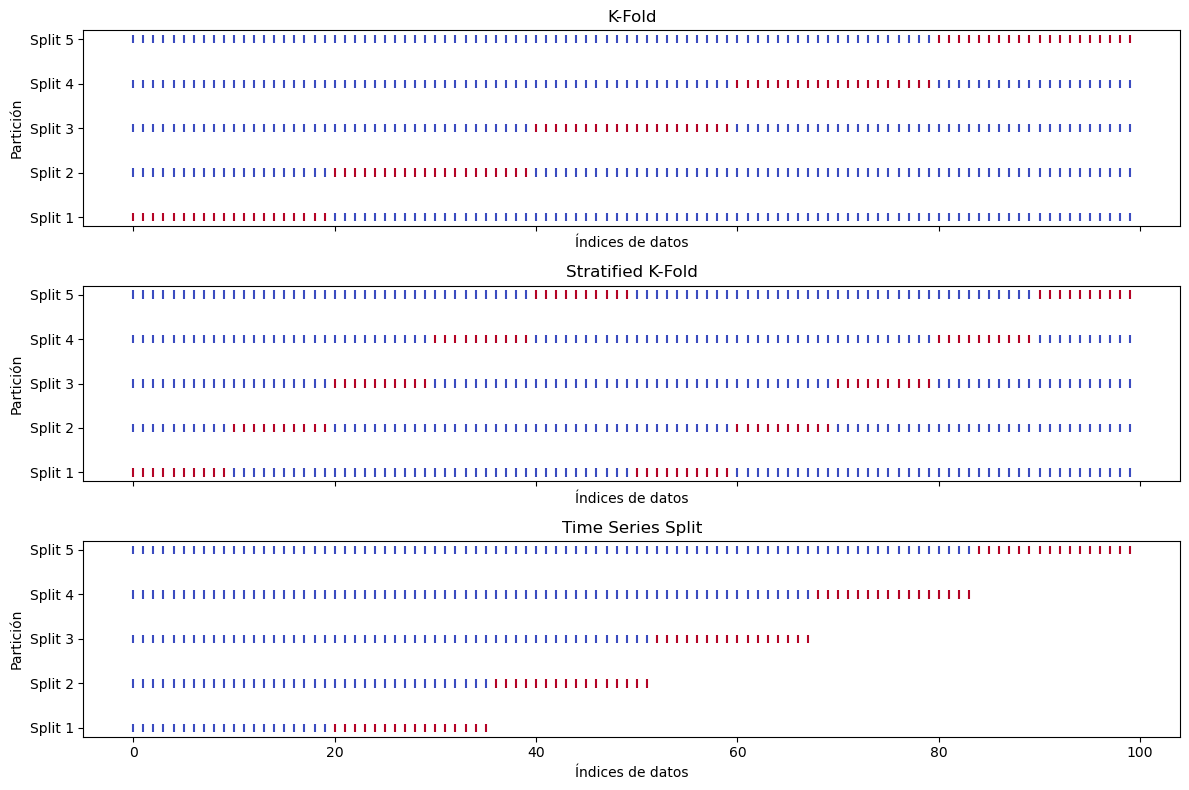

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, TimeSeriesSplit

# Crear una función para graficar los splits
def plot_cv_indices(cv, X, y=None, ax=None, n_splits=5, title=None):
    for ii, (train, test) in enumerate(cv.split(X, y)):
        indices = np.full(len(X), np.nan)
        indices[test] = 1
        indices[train] = 0
        ax.scatter(range(len(indices)), [ii + 0.5] * len(indices), 
                   c=indices, marker='|', cmap='coolwarm', lw=1.5)
    ax.set_yticks(np.arange(n_splits) + 0.5)
    ax.set_yticklabels([f'Split {i+1}' for i in range(n_splits)])
    ax.set_title(title)
    ax.set_xlabel('Índices de datos')
    ax.set_ylabel('Partición')

# Datos simulados
X = np.arange(100)
y_class = np.array([0] * 50 + [1] * 50)  # Para clasificación

fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# K-Fold
kf = KFold(n_splits=5, shuffle=False)
plot_cv_indices(kf, X, ax=axs[0], title="K-Fold")

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5)
plot_cv_indices(skf, X, y_class, ax=axs[1], title="Stratified K-Fold")

# Time Series Split
tscv = TimeSeriesSplit(n_splits=5)
plot_cv_indices(tscv, X, ax=axs[2], title="Time Series Split")

plt.tight_layout()
plt.show()


#### 🧮 ¿Cómo se calculan las métricas?
- El conjunto se divide en 5 partes (folds).
- En cada iteración, se entrena con 4 partes y se evalúa con la restante.
- Se repite 5 veces, cambiando el fold de prueba.
- Las métricas que se obtienen son el promedio de esas 5 evaluaciones.

#### ✅ Ejemplo 1: Regresión con Validación Cruzada

In [9]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score

# Cargar datos
data = fetch_california_housing(as_frame=True)
df = data.frame
X = df[['MedInc', 'AveRooms', 'AveOccup']]
y = df['MedHouseVal']

# Modelo
model = LinearRegression()

# Métricas personalizadas
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'RMSE': make_scorer(mean_squared_error, greater_is_better=False, squared=False),
    'R2': 'r2'
}

# Validación cruzada
cv_results = cross_validate(model, X, y, cv=5, scoring=scoring)

# Promedio de métricas
print("Resultados con validación cruzada (5-fold):")
print(f"MAE medio:  {cv_results['test_MAE'].mean():.2f}")
print(f"RMSE medio: {-cv_results['test_RMSE'].mean():.2f}")  # negativo porque se invierte en scoring
print(f"R² medio:   {cv_results['test_R2'].mean():.2f}")


Resultados con validación cruzada (5-fold):
MAE medio:  0.63
RMSE medio: 0.85
R² medio:   0.42


c:\Users\bernarda.salazar\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\bernarda.salazar\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\bernarda.salazar\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\bernarda.salazar\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is depr

#### 📎 **Interpretación:**

| Métrica | Resultado | Interpretación |
|--------|-----------|----------------|
| MAE    | 0.63       | Error absoluto medio: en promedio, la predicción se desvía 0.63 unidades del valor real. |
| RMSE   | 0.85       | Penaliza errores grandes: el modelo puede cometer errores moderados ocasionalmente. |
| R²     | 0.42       | El modelo explica el 42% de la variación en el precio de las viviendas. |

> ❗ El desempeño sugiere que el modelo tiene capacidad limitada para capturar la complejidad del problema con solo tres variables. Se recomienda probar modelos no lineales o agregar más características.

### ✅ Ejemplo 2: Clasificación con Validación Cruzada

In [10]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, f1_score

# Cargar datos
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

# Modelo
clf = RandomForestClassifier(random_state=42)

# Métricas
scoring = {
    'accuracy': 'accuracy',
    'f1_macro': make_scorer(f1_score, average='macro')
}

# Validación cruzada
cv_results = cross_validate(clf, X, y, cv=5, scoring=scoring)

# Resultados
print("Resultados con validación cruzada (5-fold):")
print(f"Accuracy medio:  {cv_results['test_accuracy'].mean():.2f}")
print(f"F1-score medio:  {cv_results['test_f1_macro'].mean():.2f}")


Resultados con validación cruzada (5-fold):
Accuracy medio:  0.97
F1-score medio:  0.97


#### 📎 **Interpretación:**
- Accuracy de 0.97: Es un modelo altamente preciso en general, pero cuidado si hay clases desbalanceadas (accuracy puede engañar en esos casos).
- F1-score de 0.97: Esto sí confirma que el rendimiento es robusto incluso con clases minoritarias, porque F1 considera tanto precisión como exhaustividad.
- Validación cruzada: Al evaluar el modelo en 5 divisiones diferentes, los resultados muestran que el modelo es consistente y generaliza bien.

### 📚 Bibliografía 
- Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. O'Reilly Media.
- Hyndman, R. J., & Athanasopoulos, G. (2021). Forecasting: Principles and Practice (3rd ed.). OTexts. https://otexts.com/fpp3/
- Kuhn, M., & Johnson, K. (2013). Applied Predictive Modeling. Springer.